# Homework 2

The task is to query and visualize 100000 instead of 30000 samples. Here we will change the query to select 100000 instead of 30000. </br>

In [1]:
# Dependencies

import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib
import matplotlib.pyplot as plt

from astroquery.sdss import SDSS

# Datashader

import datashader as ds
from datashader.mpl_ext import dsshow

Changed one line of code to make it more readable and efficient - intead of (s.class = "QSO" OR s.class = "GALAXY") I used s.class IN ("QSO","GALAXY")

In [2]:
# Querying 100000 samples

with open('query_new.txt', 'r') as file:
    query = file.read().replace('\n', ' ') ## input is a single string

results = SDSS.query_sql(query, timeout=500, data_release=18).to_pandas()

results.to_csv('nlr.csv', sep=',')

C:\Users\Teodora\anaconda3\Lib\site-packages\astroquery\sdss\core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


In [3]:
gal = pd.read_csv('nlr.csv', sep=',', index_col=0)
gal.head()

,plate,mjd,fiberid,class,subclass,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,h_alpha_eqw,nii_6584_eqw
0,266,51602,1,b'GALAXY',b'',0.021275,462.11760,98.78678,72.29009,205.90460,-5.453050,-2.356328
1,266,51630,1,b'GALAXY',b'STARFORMING',0.021222,472.59040,119.49560,68.39606,224.11360,-5.588495,-2.615378
2,266,51630,4,b'GALAXY',b'STARFORMING',0.064656,99.40005,25.64047,21.44437,51.59155,-5.130115,-2.528958
3,266,51630,6,b'GALAXY',b'STARFORMING',0.052654,127.30580,38.33226,35.46671,25.78963,-21.187690,-3.849116
4,266,51602,12,b'GALAXY',b'STARFORMING',0.065024,211.50180,53.18228,15.59901,76.35482,-14.731980,-5.166841


In [4]:
gal.shape

(100000, 12)

[ 1.17762699  2.1929943   6.1290358   7.34946749  7.7536235   7.79244637
  9.33441103 10.00335891  9.02681447  6.42667779  5.68804785  4.57413018
  4.54327098  3.98282804  2.62303221  2.13227135  1.66838785  1.19056794
  1.23038627  0.96858078  0.71573441  0.7087662   0.53854286  0.42207425
  0.35338764  0.28271011  0.202078    0.20506438  0.16922788  0.16026876]


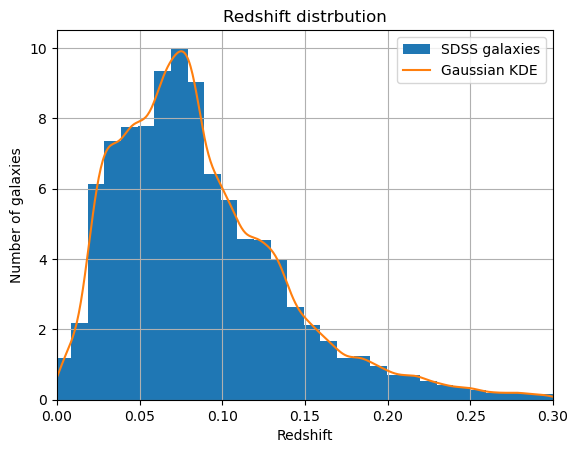

In [5]:
# Redshift distribution with kernel density estimation plot

fig, ax = plt.subplots()
ax.set_xlim(0, 0.3)
gal.z.plot.hist(bins= 30, density=True, ax=ax, label="SDSS galaxies")
gal.z.plot.kde(ax=ax, label="Gaussian KDE")
y = np.histogram(gal.z, bins= 30, density=True)
print(y[0])
plt.xlabel('Redshift')
plt.ylabel('Number of galaxies')
plt.title('Redshift distrbution')
plt.grid(True)
plt.legend()
plt.savefig('z_kde.pdf', dpi=100)

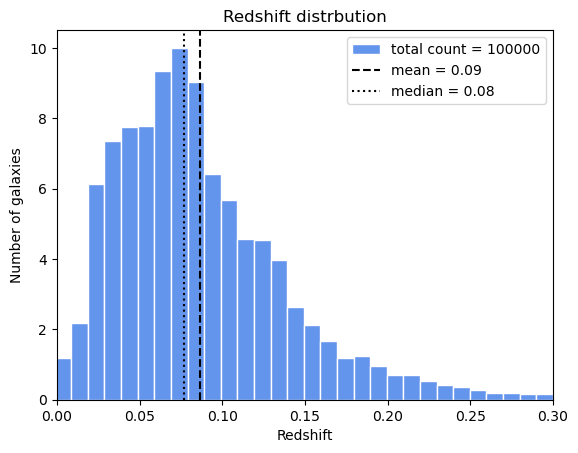

In [6]:
# Redshift distribution with mean and median visualized

fig, ax = plt.subplots()
ax.set_xlim(0, 0.3)
gal.z.plot.hist(bins= 30, color='cornflowerblue', edgecolor='white', density=True, ax=ax, label=f"total count = {len(gal)}")
plt.axvline(np.mean(gal.z), linestyle='--', c='k', label=f"mean = {np.mean(gal.z):.2f}")
plt.axvline(np.median(gal.z), linestyle=':', c='k', label=f"median = {np.median(gal.z):.2f}")
plt.xlabel('Redshift')
plt.ylabel('Number of galaxies')
plt.title('Redshift distrbution')
plt.grid(False)
plt.legend()
plt.savefig('z_dist.pdf', dpi=100)

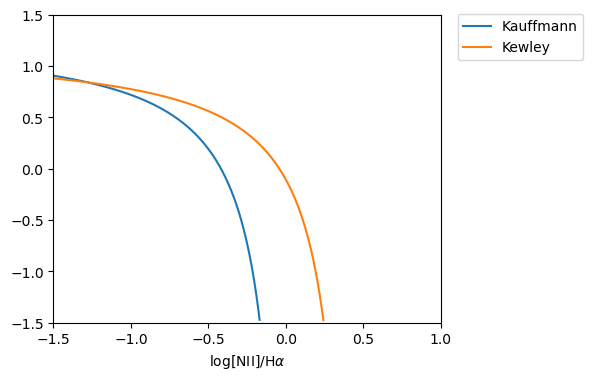

In [8]:
# Let's examine BPT division lines from papers:
# Kewley et al. (2001), ApJ 556, 121 - https://ui.adsabs.harvard.edu/abs/2001ApJ...556..121K/abstract
# Kauffman et al. (2003), MNRAS 346, 1055 - https://ui.adsabs.harvard.edu/abs/2003MNRAS.346.1055K/abstract

x = np.linspace(-1.5, 1.1, 1000)
y_kauffmann = 0.61/(x-0.05) + 1.3 #Kauffman et al. (2003), MNRAS 346, 1055
y_kewley = 0.61/(x-0.47) + 1.19 #Kewley et al. (2001), ApJ 556, 121


# division lines as a function to make it single valued in our limits

def kauffman(x):
    ## x lim was calculated for a y of -1.5
    return [0.61/(i-0.05) + 1.3 if (i < (0.61/(-1.5-1.3))+0.05) else -np.inf for i in x] 

def kewley(x):
   ## x lim was calculated for a y of -1.5 
   return [0.61/(i-0.47) + 1.19 if (i < (0.61/(-1.5-1.19))+0.47) else -np.inf for i in x] 



plt.figure(figsize=(5, 4)) 

fig.suptitle("BPT division lines")

plt.plot(x, kauffman(x), label="Kauffmann")
plt.plot(x, kewley(x), label="Kewley")
plt.xlim(-1.5, 1.0)
plt.ylim(-1.5, 1.5)
plt.xlabel(r"log[NII]/H$\alpha$")
plt.tick_params(direction='out')


plt.legend(bbox_to_anchor=(1.025,1.025), loc='upper left')
fig.tight_layout()
fig.savefig('bpt_division.pdf', dpi=100)

In [9]:
import time

def timer(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        execution_time = end_time - start_time
        print(f"{func.__name__} took {execution_time:.4f} seconds to execute.")
        return result
    return wrapper

# Example function to measure
@timer
def example_function():
    # Your code here
    time.sleep(2)


In [10]:
# Let's perfom BPT classification on our sample
# SFG = star-forming galaxy (normal galaxy)
# QSO = quasar (active galaxy, AGN = active galactic nuceli)
# composite = occupying arrea between the empirical (Kauffmann) curves and theortical (Kewly) 

def bpt_classifier(df):
    df['x_BPT'] = np.log10(df['nii_6584_flux']/df['h_alpha_flux'])
    df['y_BPT'] = np.log10(df['oiii_5007_flux']/df['h_beta_flux'])
    df['class_Kauffmann'] = np.where((df['y_BPT'] <= kauffman(df['x_BPT'])), "SFG", "QSO")
    df['class_Kewley'] = np.where((df['y_BPT'] <= kewley(df['x_BPT'])), "SFG", "QSO")
    df['class_BPT'] = np.where(((df['class_Kauffmann']=='SFG')&(df['class_Kewley']=='SFG')), "SFG", 
                                    np.where(((df['class_Kauffmann']=='QSO')&(df['class_Kewley']=='QSO')), "AGN", 
                                            "composite"))
    return df

@timer
def bpt_plt(df):

    fig = plt.figure(figsize=(7, 7))

    x = df['x_BPT']
    y = df['y_BPT']
    xy = np.vstack([x,y])
    df["kde"] = gaussian_kde(xy)(xy) #scatter plot colored by density using gaussian_kde

    class_dict = {'SFG': plt.cm.Blues, 
                  'composite': plt.cm.Greens, 
                  'AGN': plt.cm.Oranges
                  }
    
    for class_gal in class_dict.keys():
        df_sub = df[df['class_BPT'] == class_gal]
        x_sub = df_sub['x_BPT']
        y_sub = df_sub['y_BPT']
        z_sub = df_sub['kde']
        normalize = matplotlib.colors.Normalize(vmin=-1, vmax=1)
        plt.scatter(x_sub, y_sub, c=z_sub, s=5, edgecolor=None,
                    cmap=class_dict[class_gal], norm=normalize)
    
    x = np.linspace(np.min(df['x_BPT']),np.max( df['x_BPT']), 1000)
    
    plt.plot(x, kauffman(x), 'k--', label="Kauffmann")
    plt.plot(x, kewley(x), 'k:', label="Kewley")

    scatter1 = plt.scatter([], [], c='cornflowerblue', label="SFG")
    scatter2 = plt.scatter([], [], c='green', label="composite")
    scatter3 = plt.scatter([], [], c='darkorange', label="AGN")
    plt.title('BPT diagram')
    plt.legend((scatter3, scatter2, scatter1), ["QSO", "composite", "SFG"], 
              loc='lower left', title="BPT classification", fontsize='medium')
    plt.xlabel(r"log [NII]$\lambda$6584/H$\alpha$", fontsize=12)
    plt.ylabel(r"log [OIII]$\lambda$5007/H$\beta$", fontsize=12)
    plt.xlim(-1.5, 0.6)
    plt.ylim(-1.5, 1.5)
    plt.subplots_adjust(hspace=.0)
    
    return fig

bpt_plt took 417.7443 seconds to execute.


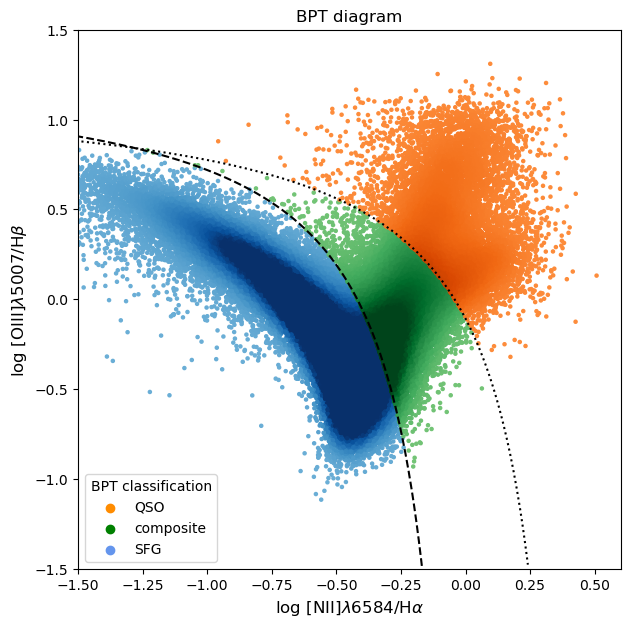

In [11]:
# Plotting the graph using gaussian_kde from scipy.stats

fig = bpt_plt(bpt_classifier(gal))
fig.savefig('bpt_classic.pdf', dpi=100)

plot_bpt_diagram_with_datashader took 3.7219 seconds to execute.


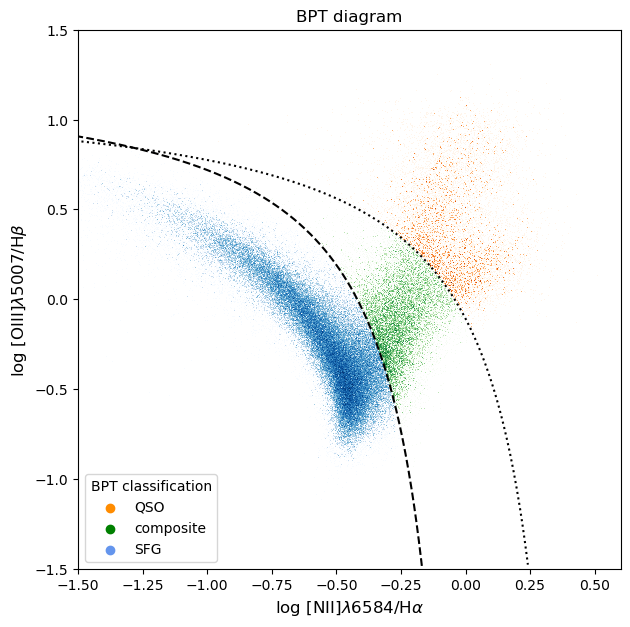

In [12]:
@timer
def plot_bpt_diagram_with_datashader(df, class_colors=None, return_fig=False):
    """
    Plot BPT diagram using Datashader.

    Parameters:
    - df: DataFrame containing BPT data
    - class_colors: Dictionary mapping galaxy classes to colormap (default is None)
    - return_fig: Flag to indicate whether to return the Matplotlib figure (default is False)

    Returns:
    - None (displays the plot) or Matplotlib figure if return_fig is True
    """

    def scatter_plot_with_datashader(ax, x, y, color=None):
        """
        Create a scatter plot using Datashader.

        Parameters:
        - ax: Matplotlib axis to plot on
        - x: x-axis data
        - y: y-axis data
        - color: colormap for Datashader (default is None)
        """
        df_subset = pd.DataFrame(dict(x=x, y=y))
        dsshow(
            df_subset,
            ds.Point("x", "y"),
            ds.count(),
            cmap=color,
            norm="log",
            aspect="auto",
            ax=ax
        )

    # Create a Matplotlib figure and axis
    fig, ax = plt.subplots(figsize=(7, 7))

    # Define default class colors if not provided
    if class_colors is None:
        class_colors = {'SFG': plt.cm.Blues,
                        'composite': plt.cm.Greens,
                        'AGN': plt.cm.Oranges}

    # Iterate over galaxy classes and corresponding colormaps
    for class_gal, color_map in class_colors.items():
        df_class = df[df['class_BPT'] == class_gal]
        scatter_plot_with_datashader(ax, df_class['x_BPT'], df_class['y_BPT'], color=color_map)

    # Generate x-axis values for theoretical curves
    x_values = np.linspace(np.min(df['x_BPT']), np.max(df['x_BPT']), 1000)

    # Plot the Kauffmann and Kewley theoretical curves
    plt.plot(x_values, kauffman(x_values), 'k--', label="Kauffmann")
    plt.plot(x_values, kewley(x_values), 'k:', label="Kewley")

    # Create empty scatter plots for legend entries
    scatter_sfg = plt.scatter([], [], c='cornflowerblue', label="SFG")
    scatter_comp = plt.scatter([], [], c='green', label="composite")
    scatter_agn = plt.scatter([], [], c='darkorange', label="AGN")

    # Set plot title and legend
    plt.title('BPT diagram')
    plt.legend((scatter_agn, scatter_comp, scatter_sfg), ["QSO", "composite", "SFG"],
               loc='lower left', title="BPT classification", fontsize='medium')

    # Set x and y axis labels
    plt.xlabel(r"log [NII]$\lambda$6584/H$\alpha$", fontsize=12)
    plt.ylabel(r"log [OIII]$\lambda$5007/H$\beta$", fontsize=12)

    # Set x and y axis limits
    plt.xlim(-1.5, 0.6)
    plt.ylim(-1.5, 1.5)

    # Return Matplotlib figure if requested
    if return_fig:
        return fig

# Example: Plot BPT diagram with Datashader
plot_bpt_diagram_with_datashader(gal, return_fig=False)